# Insurance Claims Charges Prediction

### STEP-1: Importing Libraries & Data Set

In [1]:
#import basic libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
#Read the Data 

insdata = pd.read_csv('insurance.csv')

### STEP-2:Exploratory Data Analysis (EDA)

In [3]:
insdata.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
print('Dimensions: {} Rows and {} Columns '.format(insdata.shape[0], insdata.shape[1]))

Dimensions: 1338 Rows and 7 Columns 


In [5]:
# Descriptive stats

insdata.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
# dataset information

insdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [7]:
insdata.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
insdata['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [9]:
#insdata.corr()

#### Visulizations

Text(0.5, 1.0, 'Age vs Charges')

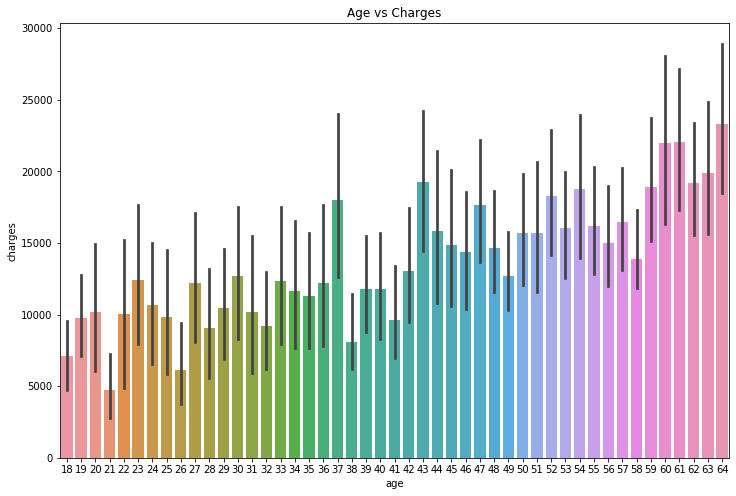

In [10]:
# Age vs Charges
# the more the age the more will be insurance charge

plt.figure(figsize = (12, 8))
sns.barplot(x = 'age', y = 'charges', data = insdata)

plt.title("Age vs Charges")

Text(0.5, 1.0, 'sex vs charges')

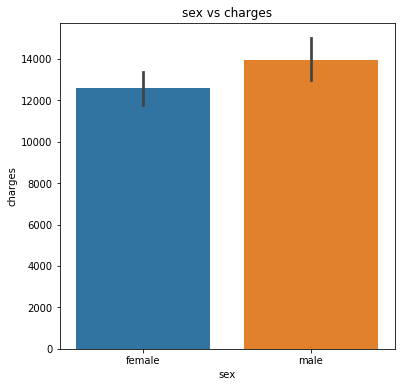

In [11]:
# sex vs charges
# males insurance charges more than females.

plt.figure(figsize = (6, 6))
sns.barplot(x = 'sex', y = 'charges', data = insdata)

plt.title('sex vs charges')

Text(0.5, 1.0, 'smoker vs charges')

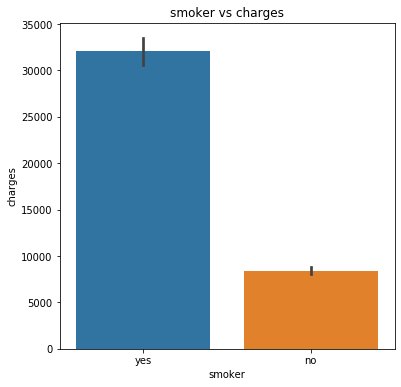

In [12]:
# smoker vs charges
# smokers have more insurance charges than the non smokers

plt.figure(figsize = (6, 6))
sns.barplot(x = 'smoker', y = 'charges', data = insdata)

plt.title('smoker vs charges')

Text(0.5, 1.0, 'region vs charges')

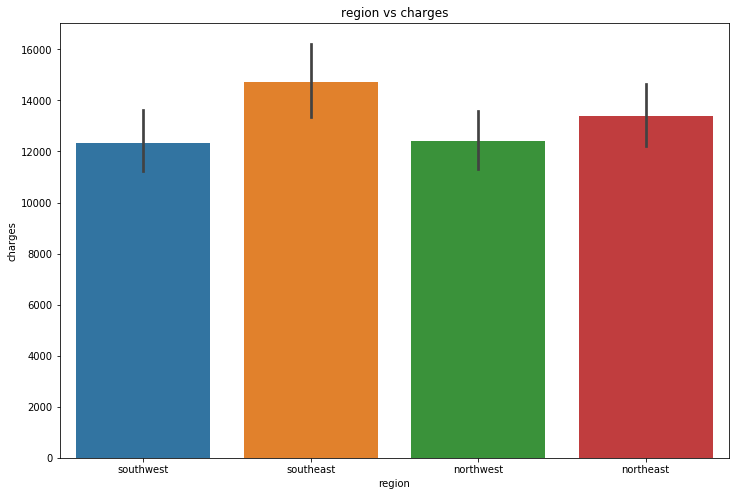

In [13]:
# region vs charges
# region actually does not play any role in determining the insurance charges

plt.figure(figsize = (12, 8))
sns.barplot(x = 'region', y = 'charges', data = insdata)

plt.title('region vs charges')

###### Correlation Plot

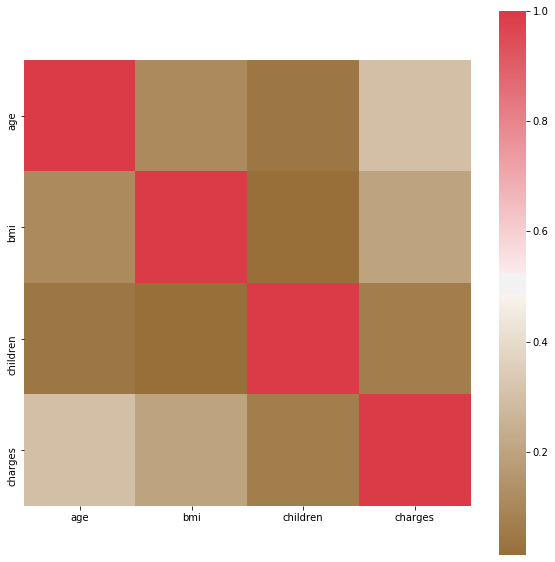

In [14]:
# plotting the correlation plot for the dataset

f, ax = plt.subplots(figsize = (10, 10))

corr = insdata.corr()
sns.heatmap(corr, mask = np.zeros_like(corr, dtype = np.bool), 
            cmap = sns.diverging_palette(50, 10, as_cmap = True), square = True, ax = ax)

### STEP-3:Data Preprocessing / Clean the Data

In [15]:
# removing unnecassary columns from the dataset

insdata = insdata.drop('region', axis = 1)

print(insdata.shape)
insdata.columns

(1338, 6)


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges'], dtype='object')

In [16]:
# Label Encoding for sex and smoker

# importing label encoder
from sklearn.preprocessing import LabelEncoder

# creating a label encoder
le = LabelEncoder()


# label encoding for sex
# 0 for females and 1 for males
insdata['sex'] = le.fit_transform(insdata['sex'])

# label encoding for smoker
# 0 for smokers and 1 for non smokers
insdata['smoker'] = le.fit_transform(insdata['smoker'])

In [17]:
insdata['sex'].value_counts()

1    676
0    662
Name: sex, dtype: int64

In [18]:
insdata['smoker'].value_counts()

0    1064
1     274
Name: smoker, dtype: int64

In [19]:
#Selecting Independent (Features) & Dependent(Target) variables

#x = insdata.iloc[:,:5]
#y = insdata.iloc[:,5]

X = insdata.drop(columns=['charges'])
y = insdata['charges']

In [21]:
print(X.shape)
X.sample(5)

(1338, 5)


,age,sex,bmi,children,smoker
220,34,0,33.700,1,0
176,38,1,27.835,2,0
842,23,0,32.780,2,1
946,42,1,35.800,2,0
64,20,0,22.420,0,1


In [22]:
print(y.shape)
y.tail(5)

(1338,)


1333    10600.5483
1334     2205.9808
1335     1629.8335
1336     2007.9450
1337    29141.3603
Name: charges, dtype: float64

#### Splitting the dataset into the Training set and Test set

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state = 1)

In [24]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1070, 5)
(268, 5)
(1070,)
(268,)


### STEP-4 : Fit the Model & Predict , check the Accuracy

#### Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,accuracy_score,r2_score

from math import sqrt

# creating the model
lrmodel = LinearRegression()

# feeding the training data to the model
lrmodel.fit(X_train, y_train)

# predicting the test set results
y_pred = lrmodel.predict(X_test)

# calculating the mean squared error
MSE = mean_squared_error(y_test, y_pred)
print('MSE: ', MSE)

# Calculating the root mean squared error
RMSE = sqrt(mean_squared_error(y_test, y_pred))       
print('RMSE: ', RMSE)

# Calculating the r2 score
R2 = r2_score(y_test, y_pred)
print('R2 :', R2)

MSE:  35699244.58251515
RMSE:  5974.884482775809
R2 : 0.7608581750738531


#### Support Vector Machine

In [26]:
from sklearn.svm import SVR

# creating the model
svrmodel = SVR()

# feeding the training data to the model
svrmodel.fit(X_train, y_train)

# predicting the test set results
y_pred = svrmodel.predict(X_test)

# calculating the mean squared error
MSE = mean_squared_error(y_test, y_pred)
print('MSE: ', MSE)

# Calculating the root mean squared error
RMSE = sqrt(mean_squared_error(y_test, y_pred))       
print('RMSE: ', RMSE)

# Calculating the r2 score
R2 = r2_score(y_test, y_pred)
print('R2 :', R2)

MSE:  166622476.46923923
RMSE:  12908.232894910103
R2 : -0.11616936331711347


#### Decision Tree

In [27]:
from sklearn.tree import DecisionTreeRegressor

# creating the model
dtrmodel = DecisionTreeRegressor()

# feeding the training data to the model
dtrmodel.fit(X_train, y_train)

# predicting the test set results
y_pred = dtrmodel.predict(X_test)

# calculating the mean squared error
MSE = mean_squared_error(y_test, y_pred)
print('MSE: ', MSE)

# Calculating the root mean squared error
RMSE = sqrt(mean_squared_error(y_test, y_pred))       
print('RMSE: ', RMSE)

# Calculating the r2 score
R2 = r2_score(y_test, y_pred)
print('R2 :', R2)

MSE:  43565448.12260634
RMSE:  6600.412723656479
R2 : 0.7081641113249728


#### Random Forest

In [28]:
from sklearn.ensemble import RandomForestRegressor

# creating the model
#rfrmodel = RandomForestRegressor()
rfrmodel = RandomForestRegressor(n_estimators = 40, max_depth = 4, n_jobs = -1)

# feeding the training data to the model
rfrmodel.fit(X_train, y_train)

# predicting the test set results
y_pred = rfrmodel.predict(X_test)

# calculating the mean squared error
MSE = mean_squared_error(y_test, y_pred)
print('MSE: ', MSE)

# Calculating the root mean squared error
RMSE = sqrt(mean_squared_error(y_test, y_pred))       
print('RMSE: ', RMSE)

# Calculating the r2 score
R2 = r2_score(y_test, y_pred)
print('R2 :', R2)

MSE:  18778044.06500328
RMSE:  4333.364058673501
R2 : 0.8742097829025797


#### Random Forest Model score is best with R2 score as 0.87